In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# read and clean data by removing unwanted text and spaces
data = pd.read_csv("data/exp1_20200914_samsung", header=None)
data[0] = data[0].str.replace("from onCreate", "")
data[0] = data[0].str.replace("from MainActivity onCreate", "")
data[0] = data[0].str.strip()

data["timestamp"] = pd.to_datetime(data[0], format="%d %b %Y %H:%M:%S:%f")

In [44]:
group1min = data.groupby(pd.Grouper(key="timestamp",freq="1min")).count()
group5min = data.groupby(pd.Grouper(key="timestamp",freq="5min")).count()
# rename the column name to count
group1min.rename( columns={0: "count"}, inplace=True)
group5min.rename( columns={0: "count"}, inplace=True)

group5min["count"].value_counts()

6     76
1     14
2     11
10    10
14     6
0      6
8      5
3      5
13     3
9      2
5      1
Name: count, dtype: int64

In [45]:
# calculate results for 1 minute intervals
g1_total_rows = len(group1min)
g1_misses = group1min["count"].value_counts()[0]
g1_score = (g1_total_rows - g1_misses)/g1_total_rows
print(g1_score)

0.7973950795947902


In [46]:
# calculate results for 5 minute intervals
g5_total_rows = len(group5min)
g5_misses = group5min["count"].value_counts()[0]
g5_score = (g5_total_rows - g5_misses)/g5_total_rows
print(g5_score)

0.9568345323741008


Looking at data from 14 Sep 2020 19:54:03:050 to 15 Sep 2020 07:24:05:850
1 min intervals: 79.74% missing 140 intervals
5 min intervals: 95.68% missing 6 intervals


Text(0.5, 1.0, 'Experiment 1 - 14 Sept 11pm to 15 Sept 7:24am')

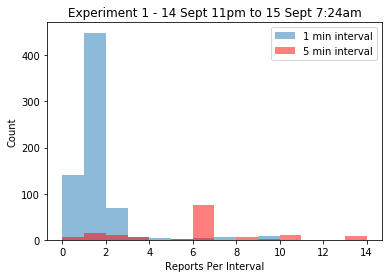

In [42]:
print("Looking at data from", data[0].iloc[0] , "to" , data[0].iloc[-1])
print("1 min intervals:", "{0:.2%}".format(g1_score) , "missing" , g1_misses , "intervals")
print("5 min intervals:", "{0:.2%}".format(g5_score) , "missing" , g5_misses , "intervals")

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(group1min.values, bins=10, alpha=.5)
_ = ax.hist(group5min.values, color='red', alpha=.5, bins=14)
ax.legend(["1 min interval", "5 min interval"])
ax.set_xlabel("Reports Per Interval")
ax.set_ylabel("Count")
ax.set_title("Experiment 1 - 14 Sept 11pm to 15 Sept 7:24am")